In [16]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [17]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [18]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

子目录或文件 -p 已经存在。
处理: -p 时出错。
子目录或文件 input 已经存在。
处理: input 时出错。
子目录或文件 -p 已经存在。
处理: -p 时出错。
子目录或文件 outputs 已经存在。
处理: outputs 时出错。


# Generator

In [19]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [20]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [21]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [22]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [23]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [24]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [25]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [26]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [27]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [28]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:08, 14.45it/s]                         


Epoch 1 of 100
Generator loss: 1.35674484, Discriminator loss: 0.89226982


118it [00:08, 14.44it/s]                         


Epoch 2 of 100
Generator loss: 2.24553392, Discriminator loss: 1.42571833


118it [00:08, 13.87it/s]                         


Epoch 3 of 100
Generator loss: 3.91223736, Discriminator loss: 0.67047587


118it [00:08, 14.69it/s]                         


Epoch 4 of 100
Generator loss: 1.94465070, Discriminator loss: 1.12516400


118it [00:08, 14.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


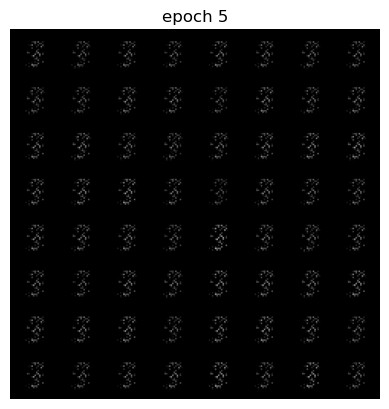

Epoch 5 of 100
Generator loss: 1.66899272, Discriminator loss: 1.49075010


118it [00:08, 14.26it/s]                         


Epoch 6 of 100
Generator loss: 1.75507088, Discriminator loss: 0.92569290


118it [00:08, 14.55it/s]                         


Epoch 7 of 100
Generator loss: 1.22125353, Discriminator loss: 1.20619845


118it [00:08, 14.43it/s]                         


Epoch 8 of 100
Generator loss: 1.47506147, Discriminator loss: 1.02155611


118it [00:08, 14.33it/s]                         


Epoch 9 of 100
Generator loss: 1.68824347, Discriminator loss: 1.11772183


118it [00:08, 13.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


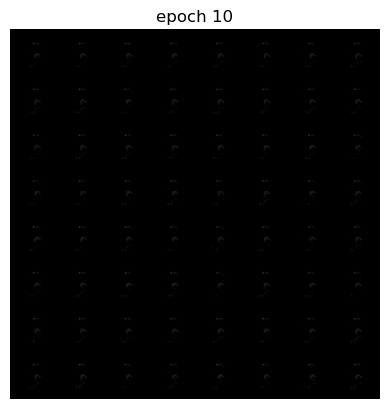

Epoch 10 of 100
Generator loss: 0.79018018, Discriminator loss: 1.16886185


118it [00:08, 14.12it/s]                         


Epoch 11 of 100
Generator loss: 1.01205085, Discriminator loss: 1.37063302


118it [00:08, 14.50it/s]                         


Epoch 12 of 100
Generator loss: 2.15643479, Discriminator loss: 0.91862841


118it [00:08, 14.22it/s]                         


Epoch 13 of 100
Generator loss: 1.58913659, Discriminator loss: 1.07127175


118it [00:08, 14.33it/s]                         


Epoch 14 of 100
Generator loss: 2.09002164, Discriminator loss: 0.87805289


118it [00:08, 14.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


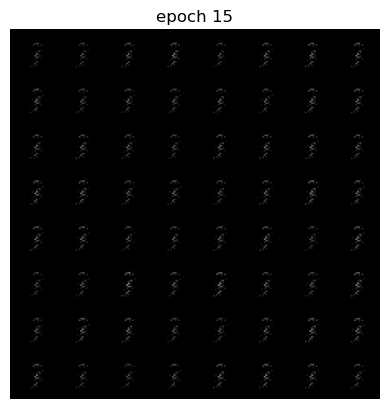

Epoch 15 of 100
Generator loss: 1.78967879, Discriminator loss: 0.75120195


118it [00:08, 14.56it/s]                         


Epoch 16 of 100
Generator loss: 2.33042524, Discriminator loss: 0.65156073


118it [00:08, 14.56it/s]                         


Epoch 17 of 100
Generator loss: 1.76773803, Discriminator loss: 1.02395907


118it [00:08, 14.44it/s]                         


Epoch 18 of 100
Generator loss: 1.88767582, Discriminator loss: 0.77028700


118it [00:08, 14.45it/s]                         


Epoch 19 of 100
Generator loss: 2.37042576, Discriminator loss: 0.64420632


118it [00:08, 14.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


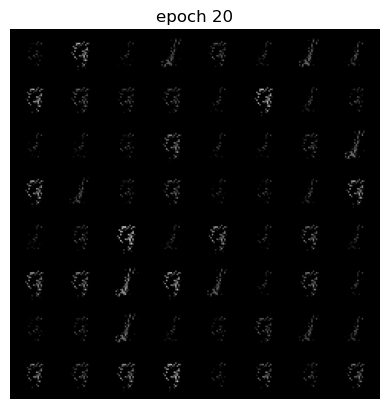

Epoch 20 of 100
Generator loss: 2.98744479, Discriminator loss: 0.38684258


118it [00:08, 14.47it/s]                         


Epoch 21 of 100
Generator loss: 2.96827408, Discriminator loss: 0.66148239


118it [00:08, 14.48it/s]                         


Epoch 22 of 100
Generator loss: 2.63872802, Discriminator loss: 0.59018520


118it [00:08, 14.36it/s]                         


Epoch 23 of 100
Generator loss: 2.16917975, Discriminator loss: 0.79350760


118it [00:08, 13.78it/s]                         


Epoch 24 of 100
Generator loss: 2.49898358, Discriminator loss: 0.63784821


118it [00:08, 14.56it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


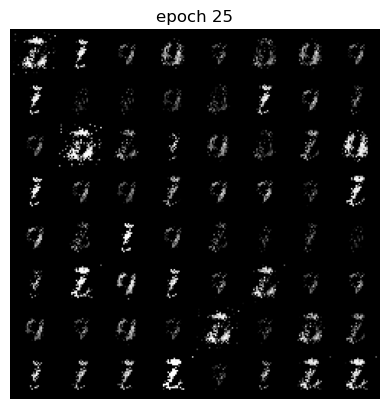

Epoch 25 of 100
Generator loss: 2.71163838, Discriminator loss: 0.52212879


118it [00:08, 14.53it/s]                         


Epoch 26 of 100
Generator loss: 2.84815829, Discriminator loss: 0.55118236


118it [00:08, 14.58it/s]                         


Epoch 27 of 100
Generator loss: 2.45167037, Discriminator loss: 0.62796545


118it [00:08, 14.65it/s]                         


Epoch 28 of 100
Generator loss: 2.70674243, Discriminator loss: 0.53880607


118it [00:08, 14.36it/s]                         


Epoch 29 of 100
Generator loss: 2.05558239, Discriminator loss: 0.73841422


118it [00:08, 14.45it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


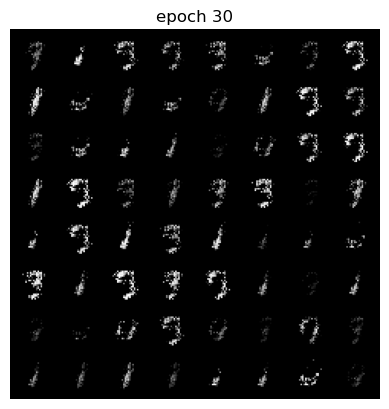

Epoch 30 of 100
Generator loss: 2.55354988, Discriminator loss: 0.59331497


118it [00:08, 14.01it/s]                         


Epoch 31 of 100
Generator loss: 2.64239294, Discriminator loss: 0.54970953


118it [00:08, 14.38it/s]                         


Epoch 32 of 100
Generator loss: 2.81152450, Discriminator loss: 0.50183774


118it [00:08, 14.36it/s]                         


Epoch 33 of 100
Generator loss: 2.77000763, Discriminator loss: 0.57200967


118it [00:08, 14.33it/s]                         


Epoch 34 of 100
Generator loss: 2.71200455, Discriminator loss: 0.46170233


118it [00:08, 14.42it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


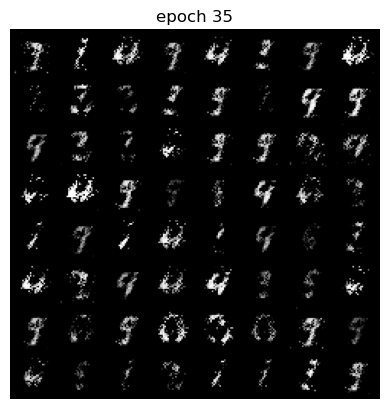

Epoch 35 of 100
Generator loss: 3.15212528, Discriminator loss: 0.43826163


118it [00:08, 14.37it/s]                         


Epoch 36 of 100
Generator loss: 2.95630286, Discriminator loss: 0.55916373


118it [00:08, 14.44it/s]                         


Epoch 37 of 100
Generator loss: 2.91666323, Discriminator loss: 0.57159197


118it [00:08, 14.61it/s]                         


Epoch 38 of 100
Generator loss: 3.34852044, Discriminator loss: 0.39888894


118it [00:08, 14.62it/s]                         


Epoch 39 of 100
Generator loss: 3.23538399, Discriminator loss: 0.48925796


118it [00:08, 14.69it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


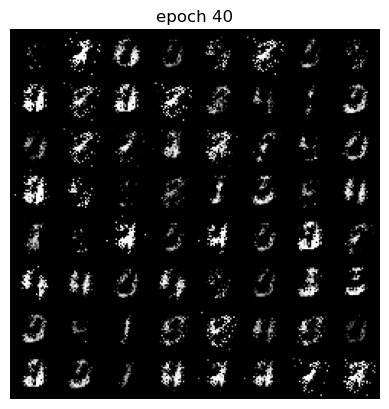

Epoch 40 of 100
Generator loss: 3.17248978, Discriminator loss: 0.58381810


118it [00:08, 14.31it/s]                         


Epoch 41 of 100
Generator loss: 3.05257842, Discriminator loss: 0.45956230


 38%|███▊      | 44/117 [00:03<00:05, 14.46it/s]

In [ ]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################

# label smoothing for part c
def label_smooth(label):
    smooth_f = torch.rand_like(label)
    return label - 0.3 + (smooth_f * 0.5)


for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        # part a & b
        discriminator.zero_grad()
        real_images = data[0].to(device)
        real_labels = label_real(real_images.size(0))
        # real_labels = label_smooth(real_labels) # part c
        output_real = discriminator(real_images)
        loss_real = discriminator_loss(output_real, real_labels)

        noise0=create_noise(batch_size, nz)
        fake_images = generator(noise0)
        fake_labels = label_fake(fake_images.size(0))
        output_fake = discriminator(fake_images.detach())
        loss_fake = discriminator_loss(output_fake, fake_labels)
        d_loss = loss_fake+loss_real
        d_loss.backward()
        optim_d.step()
        loss_d += d_loss.item()

        generator.zero_grad()
        generated_images = generator(noise0)
        output_fake = discriminator(generated_images)

        g_loss = generator_loss(output_fake, label_real(batch_size)) # part a
        # g_loss = generator_loss(output_fake, label_fake(batch_size)) # part b

        g_loss.backward()
        optim_g.step()
        loss_g += g_loss.item()

    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [ ]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

In [ ]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

In [ ]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')